Introduction cell 

My first Machine learning pipeline creating a model with preprocessing and and evaluation

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer





housing_dataset = pd.read_csv('housing.csv')
print(housing_dataset.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [15]:
#print(housing_dataset.info())
#print(housing_dataset['bathrooms'].value_counts())
#print(housing_dataset.describe())
print(housing_dataset.dtypes)


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


Splitting the data into train and etsing sets.

In [18]:
X = housing_dataset.drop('price', axis=1)
y = housing_dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_columns = X_train.select_dtypes(include=['object']).columns

Creating data pipeline

In [21]:
categorical_preprocessor = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value=0))
])

numeric_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocessor, num_columns),
        ('cat', categorical_preprocessor, cat_columns)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

Fitting training set to the model and start evaluating the models efficiency

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
accuracy = model.score(X_test, y_test)
print(f'R^2 Score: {accuracy}')



Mean Squared Error: 1754318687330.6685
Mean Absolute Error: 970043.4039201644
R^2 Score: 0.6529242642153175


Testing to see if these errors are reasonable or not

In [25]:
print(y.mean())
print(y.median())
print(mae / y.mean())


4766729.247706422
4340000.0
0.20350293744645018


Plotting the test data predicted to the actual prices

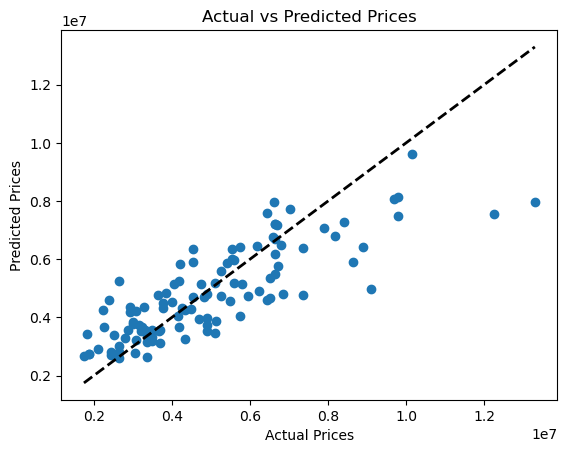

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()
